In [ ]:
import pandas as pd
import numpy as np
import sklearn

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
weatherdf = pd.read_csv("/content/drive/MyDrive/AustraliaWeather/WeatherTrainingData.csv")
weatherdf.shape

(99516, 23)

In [ ]:
weatherdf.rename(columns={'row ID': 'row_ID'}, inplace = True)

In [ ]:
weatherdf.isna().sum()

row_ID               0
Location             0
MinTemp            443
MaxTemp            230
Rainfall           979
Evaporation      42531
Sunshine         47317
WindGustDir       6521
WindGustSpeed     6480
WindDir9am        7006
WindDir3pm        2648
WindSpeed9am       935
WindSpeed3pm      1835
Humidity9am       1233
Humidity3pm       2506
Pressure9am       9748
Pressure3pm       9736
Cloud9am         37572
Cloud3pm         40002
Temp9am            614
Temp3pm           1904
RainToday          979
RainTomorrow         0
dtype: int64

**Pre-processing of Training Data**

In [ ]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values=np.nan, strategy="mean")

In [ ]:
impute.fit(weatherdf[['MinTemp']])
weatherdf['MinTemp'] = impute.transform(weatherdf[['MinTemp']])

impute.fit(weatherdf[['MaxTemp']])
weatherdf['MaxTemp'] = impute.transform(weatherdf[['MaxTemp']])

impute.fit(weatherdf[['Rainfall']])
weatherdf['Rainfall'] = impute.transform(weatherdf[['Rainfall']])

impute.fit(weatherdf[['Evaporation']])
weatherdf['Evaporation'] = impute.transform(weatherdf[['Evaporation']])

impute.fit(weatherdf[['Sunshine']])
weatherdf['Sunshine'] = impute.transform(weatherdf[['Sunshine']])

impute.fit(weatherdf[['WindGustSpeed']])
weatherdf['WindGustSpeed'] = impute.transform(weatherdf[['WindGustSpeed']])

impute.fit(weatherdf[['WindSpeed9am']])
weatherdf['WindSpeed9am'] = impute.transform(weatherdf[['WindSpeed9am']])

impute.fit(weatherdf[['WindSpeed3pm']])
weatherdf['WindSpeed3pm'] = impute.transform(weatherdf[['WindSpeed3pm']])

impute.fit(weatherdf[['Humidity9am']])
weatherdf['Humidity9am'] = impute.transform(weatherdf[['Humidity9am']])

impute.fit(weatherdf[['Humidity3pm']])
weatherdf['Humidity3pm'] = impute.transform(weatherdf[['Humidity3pm']])

impute.fit(weatherdf[['Pressure9am']])
weatherdf['Pressure9am'] = impute.transform(weatherdf[['Pressure9am']])

impute.fit(weatherdf[['Pressure3pm']])
weatherdf['Pressure3pm'] = impute.transform(weatherdf[['Pressure3pm']])

impute.fit(weatherdf[['Cloud9am']])
weatherdf['Cloud9am'] = impute.transform(weatherdf[['Cloud9am']])

impute.fit(weatherdf[['Cloud3pm']])
weatherdf['Cloud3pm'] = impute.transform(weatherdf[['Cloud3pm']])

impute.fit(weatherdf[['Temp9am']])
weatherdf['Temp9am'] = impute.transform(weatherdf[['Temp9am']])

impute.fit(weatherdf[['Temp3pm']])
weatherdf['Temp3pm'] = impute.transform(weatherdf[['Temp3pm']])

In [ ]:
weatherdf.isna().sum()

row_ID              0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir      6521
WindGustSpeed       0
WindDir9am       7006
WindDir3pm       2648
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday         979
RainTomorrow        0
dtype: int64

In [ ]:
weatherdf = weatherdf.dropna()
weatherdf.isnull().sum()

row_ID           0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [ ]:
weatherdf.head()

,row_ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,5.46132,7.61509,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.519122,16.9,21.8,No,0
1,Row1,Albury,7.4,25.1,0.0,5.46132,7.61509,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.447985,4.519122,17.2,24.3,No,0
2,Row2,Albury,17.5,32.3,1.0,5.46132,7.61509,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,0
3,Row3,Albury,14.6,29.7,0.2,5.46132,7.61509,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,4.447985,4.519122,20.6,28.9,No,0
4,Row4,Albury,7.7,26.7,0.0,5.46132,7.61509,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,4.447985,4.519122,16.3,25.5,No,0


**Data Analysis**

**Feature Distribution**

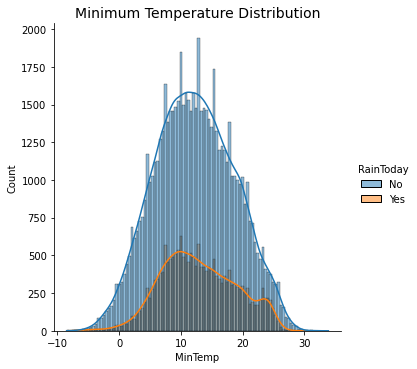

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

sns.displot(weatherdf, x='MinTemp', hue='RainToday', kde=True)
plt.title("Minimum Temperature Distribution", fontsize = 14)
plt.show()

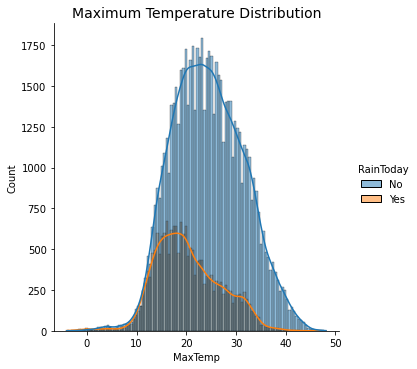

In [ ]:
sns.displot(weatherdf, x='MaxTemp', hue='RainToday', kde=True)
plt.title("Maximum Temperature Distribution", fontsize = 14)
plt.show()

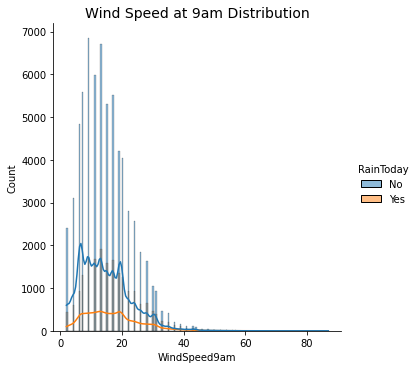

In [ ]:
sns.displot(weatherdf, x='WindSpeed9am', hue='RainToday', kde=True)
plt.title("Wind Speed at 9am Distribution", fontsize = 14)
plt.show()

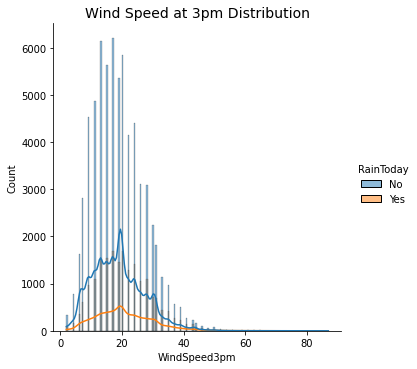

In [ ]:
sns.displot(weatherdf, x='WindSpeed3pm', hue='RainToday', kde=True)
plt.title("Wind Speed at 3pm Distribution", fontsize = 14)
plt.show()

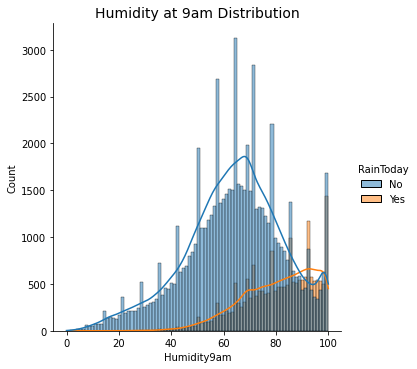

In [ ]:
sns.displot(weatherdf, x='Humidity9am', hue='RainToday', kde=True)
plt.title("Humidity at 9am Distribution", fontsize = 14)
plt.show()

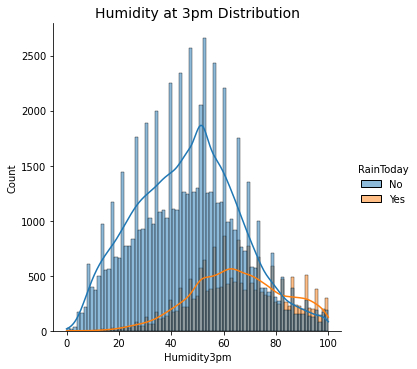

In [ ]:
sns.displot(weatherdf, x='Humidity3pm', hue='RainToday', kde=True)
plt.title("Humidity at 3pm Distribution", fontsize = 14)
plt.show()

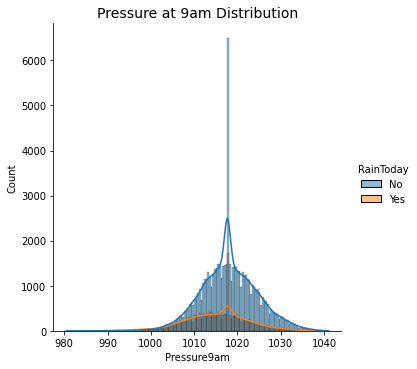

In [ ]:
sns.displot(weatherdf, x='Pressure9am', hue='RainToday', kde=True)
plt.title("Pressure at 9am Distribution", fontsize = 14)
plt.show()

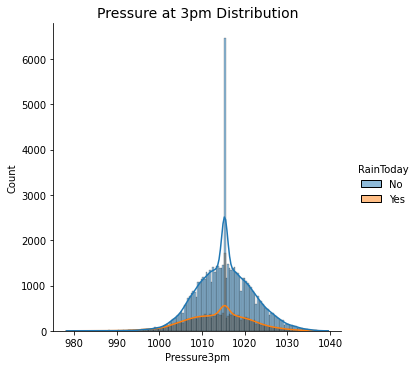

In [ ]:
sns.displot(weatherdf, x='Pressure3pm', hue='RainToday', kde=True)
plt.title("Pressure at 3pm Distribution", fontsize = 14)
plt.show()

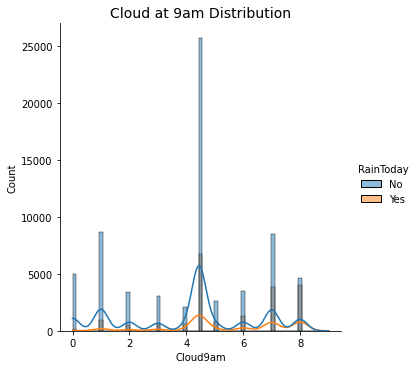

In [ ]:
sns.displot(weatherdf, x='Cloud9am', hue='RainToday', kde=True)
plt.title("Cloud at 9am Distribution", fontsize = 14)
plt.show()

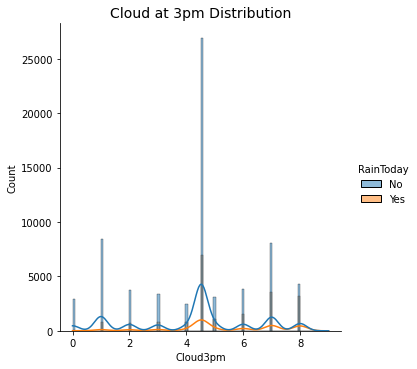

In [ ]:
sns.displot(weatherdf, x='Cloud3pm', hue='RainToday', kde=True)
plt.title("Cloud at 3pm Distribution", fontsize = 14)
plt.show()

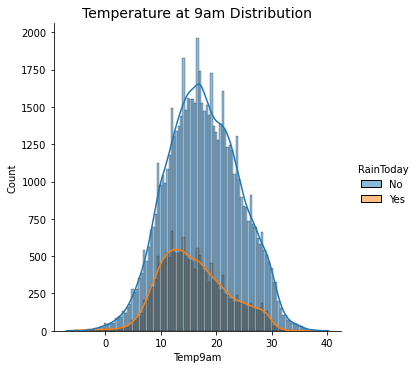

In [ ]:
sns.displot(weatherdf, x='Temp9am', hue='RainToday', kde=True)
plt.title("Temperature at 9am Distribution", fontsize = 14)
plt.show()

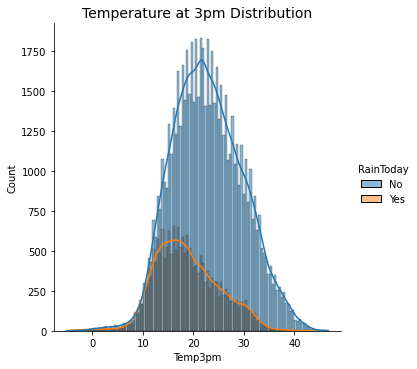

In [ ]:
sns.displot(weatherdf, x='Temp3pm', hue='RainToday', kde=True)
plt.title("Temperature at 3pm Distribution", fontsize = 14)
plt.show()

**Locationwise Observations**

In [ ]:
windspeed_weatherdf = weatherdf.groupby(['Location'])[['WindSpeed9am', 'WindSpeed3pm']].mean()
windspeed_weatherdf = windspeed_weatherdf.reset_index()
windspeed_weatherdf.head()

,Location,WindSpeed9am,WindSpeed3pm
0,Adelaide,10.893727,15.923276
1,Albury,9.957299,15.237161
2,AliceSprings,15.917231,18.308693
3,BadgerysCreek,9.239257,14.469803
4,Ballarat,20.479486,23.115175


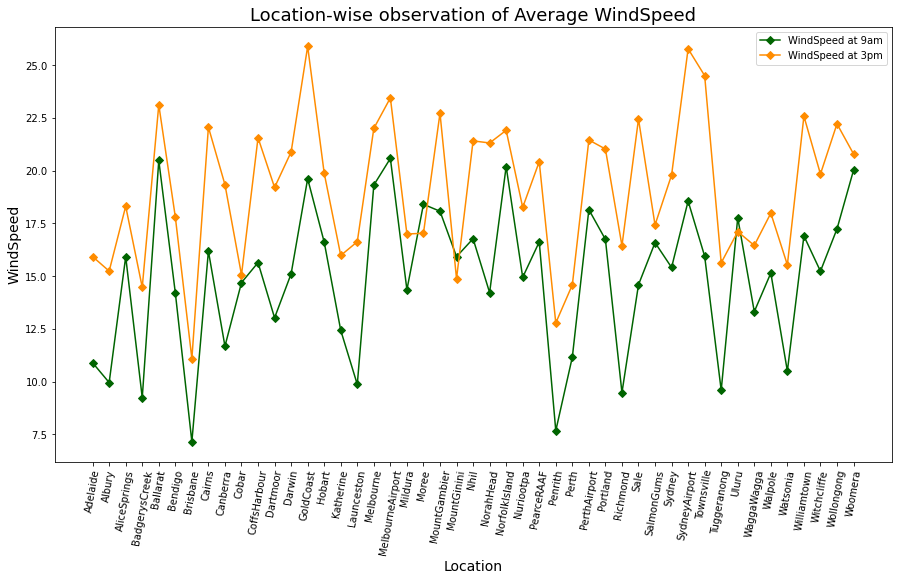

In [ ]:
x = windspeed_weatherdf.loc[:, 'Location']
y1 = windspeed_weatherdf['WindSpeed9am'] 
y2 = windspeed_weatherdf['WindSpeed3pm']

plt.figure(figsize = (15, 8))

plt.plot(x, y1, marker='D', color = 'darkgreen', label = 'WindSpeed at 9am') 
plt.plot(x, y2, marker='D', color = 'darkorange', label = 'WindSpeed at 3pm')

plt.xlabel('Location', fontsize = 14)
plt.ylabel('WindSpeed', fontsize = 14)
plt.title('Location-wise observation of Average WindSpeed', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')
plt.xticks(rotation=80)
plt.show()

In [ ]:
temperature_weatherdf = weatherdf.groupby(['Location'])[['Temp9am', 'Temp3pm']].mean()
temperature_weatherdf = temperature_weatherdf.reset_index()
temperature_weatherdf.head()

,Location,Temp9am,Temp3pm
0,Adelaide,17.040524,21.544842
1,Albury,15.198771,21.953722
2,AliceSprings,21.930921,28.399636
3,BadgerysCreek,16.861731,22.517189
4,Ballarat,11.749293,16.858113


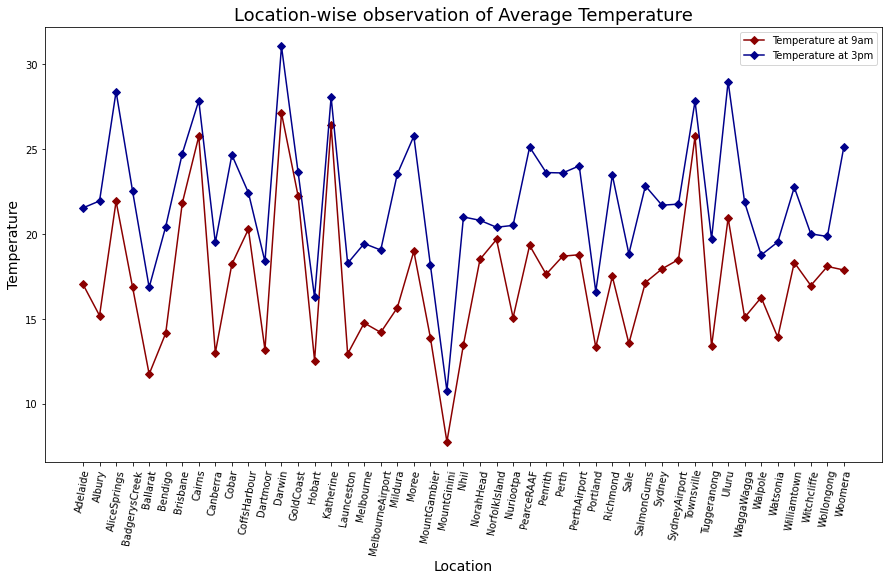

In [ ]:
x = temperature_weatherdf.loc[:, 'Location']
y1 = temperature_weatherdf['Temp9am'] 
y2 = temperature_weatherdf['Temp3pm']

plt.figure(figsize = (15, 8))

plt.plot(x, y1, marker='D', color = 'darkred', label = 'Temperature at 9am') 
plt.plot(x, y2, marker='D', color = 'darkblue', label = 'Temperature at 3pm')

plt.xlabel('Location', fontsize = 14)
plt.ylabel('Temperature', fontsize = 14)
plt.title('Location-wise observation of Average Temperature', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')
plt.xticks(rotation=80)
plt.show()

In [ ]:
cloud_weatherdf = weatherdf.groupby(['Location'])[['Cloud9am', 'Cloud3pm']].mean()
cloud_weatherdf = cloud_weatherdf.reset_index()
cloud_weatherdf.head()

,Location,Cloud9am,Cloud3pm
0,Adelaide,4.447985,4.519122
1,Albury,5.336426,5.026031
2,AliceSprings,3.123771,3.503511
3,BadgerysCreek,4.447985,4.519122
4,Ballarat,5.613767,5.680625


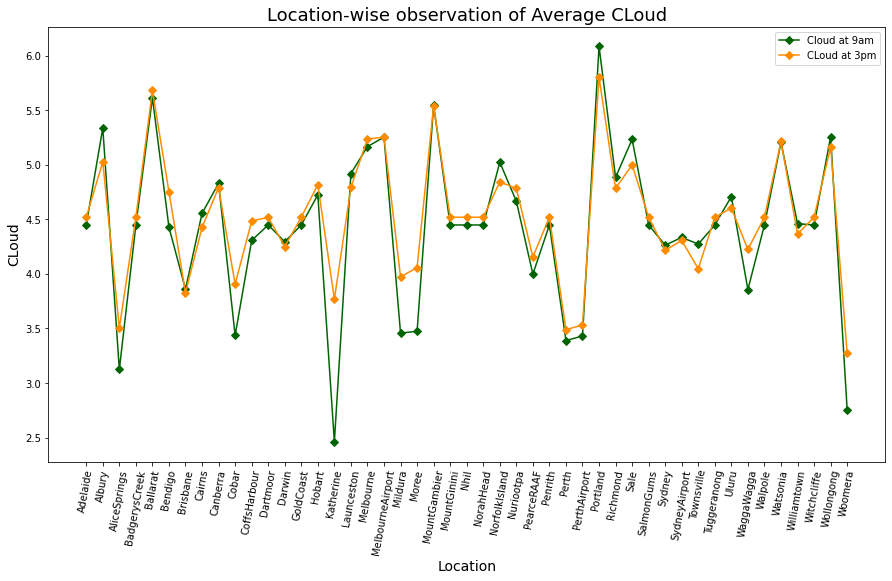

In [ ]:
x = cloud_weatherdf.loc[:, 'Location']
y1 = cloud_weatherdf['Cloud9am'] 
y2 = cloud_weatherdf['Cloud3pm']

plt.figure(figsize = (15, 8))

plt.plot(x, y1, marker='D', color = 'darkgreen', label = 'Cloud at 9am') 
plt.plot(x, y2, marker='D', color = 'darkorange', label = 'CLoud at 3pm')

plt.xlabel('Location', fontsize = 14)
plt.ylabel('CLoud', fontsize = 14)
plt.title('Location-wise observation of Average CLoud', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')
plt.xticks(rotation=80)
plt.show()

**Less Accurate Feature**

In [ ]:
del weatherdf['row_ID']
del weatherdf['Location']
del weatherdf['WindGustDir']
del weatherdf['WindDir9am']
del weatherdf['WindDir3pm']

**Label Encoding**

In [ ]:
weatherdf.loc[weatherdf.RainToday == "Yes", "RainToday"] = 1
weatherdf.loc[weatherdf.RainToday == "No", "RainToday"] = 0
weatherdf['RainToday'] = weatherdf['RainToday'].astype(int)
weatherdf

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,5.46132,7.61509,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.519122,16.9,21.8,0,0
1,7.4,25.1,0.0,5.46132,7.61509,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447985,4.519122,17.2,24.3,0,0
2,17.5,32.3,1.0,5.46132,7.61509,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0
3,14.6,29.7,0.2,5.46132,7.61509,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,4.447985,4.519122,20.6,28.9,0,0
4,7.7,26.7,0.0,5.46132,7.61509,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,4.447985,4.519122,16.3,25.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99511,8.0,20.7,0.0,5.46132,7.61509,41.0,19.0,26.0,56.0,32.0,1028.1,1024.3,4.447985,7.000000,11.6,20.0,0,0
99512,3.5,21.8,0.0,5.46132,7.61509,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,4.447985,4.519122,9.4,20.9,0,0
99513,2.8,23.4,0.0,5.46132,7.61509,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,4.447985,4.519122,10.1,22.4,0,0
99514,3.6,25.3,0.0,5.46132,7.61509,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,4.447985,4.519122,10.9,24.5,0,0


**Train-Test Split**

In [ ]:
X = weatherdf.drop('RainTomorrow', axis=1)
y = weatherdf['RainTomorrow']

**Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(weatherdf)
weatherdf=pd.DataFrame(minmax_scaler.transform(weatherdf))
weatherdf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.516509,0.517241,0.001632,0.063356,0.525179,0.289062,0.211765,0.258824,0.71,0.22,0.449587,0.470684,0.888889,0.502125,0.506356,0.519305,0.0,0.0
1,0.375000,0.559387,0.000000,0.063356,0.525179,0.289062,0.023529,0.235294,0.44,0.25,0.497521,0.482085,0.494221,0.502125,0.512712,0.567568,0.0,0.0
2,0.613208,0.697318,0.002720,0.063356,0.525179,0.265625,0.058824,0.211765,0.82,0.33,0.500826,0.452769,0.777778,0.888889,0.525424,0.671815,0.0,0.0
3,0.544811,0.647510,0.000544,0.063356,0.525179,0.382812,0.200000,0.258824,0.55,0.23,0.474380,0.442997,0.494221,0.502125,0.584746,0.656371,0.0,0.0
4,0.382075,0.590038,0.000000,0.063356,0.525179,0.218750,0.047059,0.176471,0.48,0.19,0.543802,0.519544,0.494221,0.502125,0.493644,0.590734,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86599,0.389151,0.475096,0.000000,0.063356,0.525179,0.265625,0.200000,0.282353,0.56,0.32,0.786777,0.750814,0.494221,0.777778,0.394068,0.484556,0.0,0.0
86600,0.283019,0.496169,0.000000,0.063356,0.525179,0.187500,0.152941,0.129412,0.59,0.27,0.730579,0.700326,0.494221,0.502125,0.347458,0.501931,0.0,0.0
86601,0.266509,0.526820,0.000000,0.063356,0.525179,0.187500,0.129412,0.105882,0.51,0.24,0.728926,0.685668,0.494221,0.502125,0.362288,0.530888,0.0,0.0
86602,0.285377,0.563218,0.000000,0.063356,0.525179,0.117188,0.129412,0.082353,0.56,0.21,0.710744,0.666124,0.494221,0.502125,0.379237,0.571429,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

**Classification Models**

**Machine Learning Algorithm**

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train )

y_pred = lr.predict(X_test)

accuracy_lr = lr.score(X_test, y_test)
accuracy_lr

0.3365910310249546

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred=rf.predict(X_test)

accuracy_rf = rf.score(X_test, y_test)
accuracy_rf

0.8552074513124471

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression()
logr.fit(X_train,y_train )

y_pred = logr.predict(X_test)

accuracy_logr = logr.score(X_test, y_test)
accuracy_logr

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.845354476175814

**K-Neighbors Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy_knn = knn.score(X_test, y_test)
accuracy_knn

0.83688707566777

**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

y_pred=dtree.predict(X_test)

accuracy_dtree = dtree.score(X_test, y_test)
accuracy_dtree

0.7852359325687014

**AdaBoost Classifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)

y_pred=adaboost.predict(X_test)

accuracy_adaboost = adaboost.score(X_test, y_test)
accuracy_adaboost

0.8467400508044031

**Deep Learning Algorithms**

**Multi Layer Perceptron**

In [ ]:
from sklearn.neural_network import MLPClassifier

MLPclassifier = MLPClassifier()
MLPclassifier.fit(X_train, y_train)

y_pred=MLPclassifier.predict(X_test)

accuracy_MLPclassifier = MLPclassifier.score(X_test, y_test)
accuracy_MLPclassifier

0.8463551689631283

**Chrononet**

In [ ]:
from tensorflow.keras.layers import Input,Dense,concatenate,Flatten,GRU,Conv1D
from tensorflow.keras.models import Model

In [ ]:
X_train = X_train.values
print(X_train.shape)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.values
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60622, 17)
(60622, 17, 1)
(25982, 17, 1)
(60622,)
(25982,)


In [ ]:
def block(input):
  conv1 = Conv1D(32, 2, strides=2,activation='relu',padding="same")(input)
  print(conv1.shape)
  conv2 = Conv1D(32, 4, strides=2,activation='relu',padding="causal")(input)
  conv3 = Conv1D(32, 8, strides=2,activation='relu',padding="causal")(input)
  x = concatenate([conv1,conv2,conv3],axis=2)
  return x
input= Input(shape=(17,1))
block1=block(input)
block2=block(block1)
block3=block(block2)
gru_out1 = GRU(32,activation='tanh',return_sequences=True)(block3)
gru_out2 = GRU(32,activation='tanh',return_sequences=True)(gru_out1)
gru_out = concatenate([gru_out1,gru_out2],axis=2)
gru_out3 = GRU(32,activation='tanh',return_sequences=True)(gru_out)
gru_out = concatenate([gru_out1,gru_out2,gru_out3])
gru_out4 = GRU(32,activation='tanh')(gru_out)
print(gru_out4.shape)
predictions = Dense(1,activation='sigmoid')(gru_out4)
model = Model(inputs=input, outputs=predictions)

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

(None, 9, 32)
(None, 5, 32)
(None, 3, 32)
(None, 32)


In [ ]:
history = model.fit(X_train,y_train,epochs=50,batch_size=1024,validation_data=(X_test,y_test))

Seq_model_score = model.evaluate(X_test, y_test)
Seq_model_accuracy = round(Seq_model_score[1]*100, 2)

Epoch 1/50
60/60 [==============================] - 14s 133ms/step - loss: 0.4755 - accuracy: 0.7823 - val_loss: 0.4206 - val_accuracy: 0.8097
Epoch 2/50
60/60 [==============================] - 8s 129ms/step - loss: 0.4114 - accuracy: 0.8158 - val_loss: 0.4182 - val_accuracy: 0.8087
Epoch 3/50
60/60 [==============================] - 7s 111ms/step - loss: 0.4053 - accuracy: 0.8180 - val_loss: 0.4045 - val_accuracy: 0.8179
Epoch 4/50
60/60 [==============================] - 7s 112ms/step - loss: 0.4009 - accuracy: 0.8207 - val_loss: 0.4044 - val_accuracy: 0.8170
Epoch 5/50
60/60 [==============================] - 7s 111ms/step - loss: 0.4004 - accuracy: 0.8201 - val_loss: 0.4000 - val_accuracy: 0.8212
Epoch 6/50
60/60 [==============================] - 7s 113ms/step - loss: 0.3995 - accuracy: 0.8215 - val_loss: 0.4067 - val_accuracy: 0.8170
Epoch 7/50
60/60 [==============================] - 7s 112ms/step - loss: 0.3988 - accuracy: 0.8214 - val_loss: 0.3992 - val_accuracy: 0.8211
Epoch

**Accuracy Analysis Table**

In [ ]:
accuracy_dict = {'Linear Regrssion' : accuracy_lr*100,
                 'Random Forest' : accuracy_rf*100,
                 'Logistic Regrssion' : accuracy_logr*100,
                 'K-Nearest Neighbors' : accuracy_knn*100,
                 'Decision Tree' : accuracy_dtree*100,
                 'AdaBoost Classifier' : accuracy_adaboost*100,
                 'Multi Layer Perceptron' : accuracy_MLPclassifier*100,
                 'Chrono-net' : Seq_model_accuracy
                 }
                
            
print("Classification Accuracy of All Models")
print('=====================================')
print()
for k, v in accuracy_dict.items():
    print(k,"=",v,"%")

Classification Accuracy of All Models

Linear Regrssion = 33.65910310249546 %
Random Forest = 85.52074513124471 %
Logistic Regrssion = 84.53544761758141 %
K-Nearest Neighbors = 83.688707566777 %
Decision Tree = 78.52359325687014 %
AdaBoost Classifier = 84.67400508044031 %
Multi Layer Perceptron = 84.63551689631284 %
Chrono-net = 82.41 %


**Accuracy Graph**

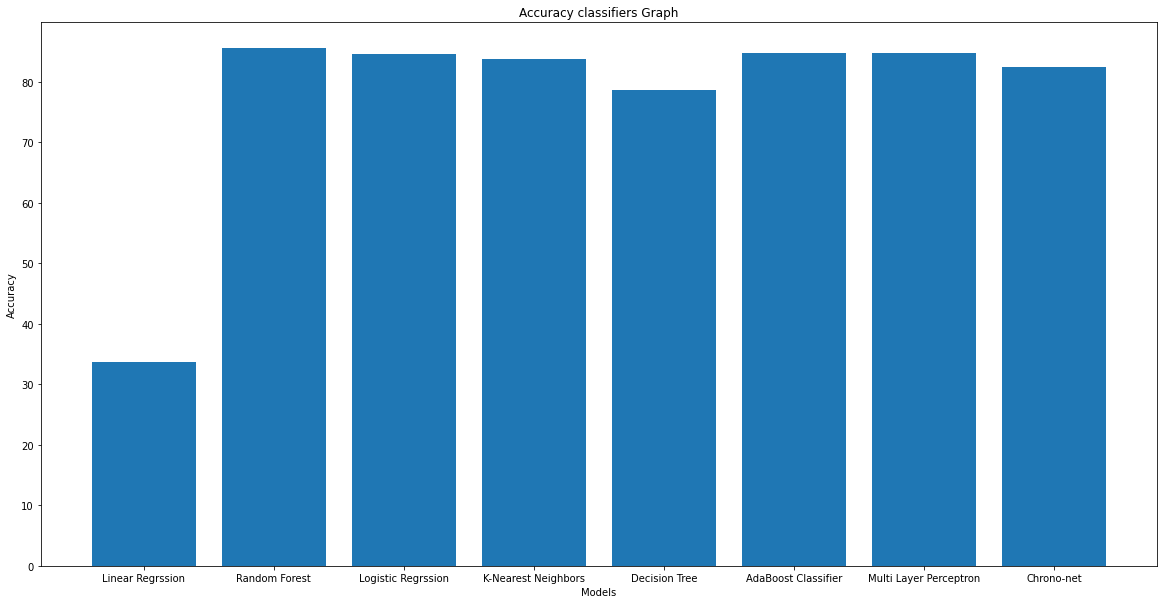

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
graph = ['Linear Regrssion', 'Random Forest', 'Logistic Regrssion', 'K-Nearest Neighbors', 'Decision Tree', 'AdaBoost Classifier', 'Multi Layer Perceptron', 'Chrono-net']
accuracies_graph= [accuracy_lr*100, accuracy_rf*100, accuracy_logr*100, accuracy_knn*100, accuracy_dtree*100, accuracy_adaboost*100, accuracy_MLPclassifier*100, Seq_model_accuracy ]
plt.bar(graph, accuracies_graph)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy classifiers Graph")
plt.show()